In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Projects\EDA_analysis\dataset\TeleCustomerChunDataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [6]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [7]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split

# Binary mapping function
def binary_mapper(df):
    return df.replace({
        'Yes': 1,
        'No': 0,
        'Male': 1,
        'Female': 0,
        'No internet service': 0,
        'No phone service': 0
    })

# Define column groups
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
]

multi_cat_cols = [
    'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'
]

numerical_cols = ['tenure', 'MonthlyCharges']

# Transformers
binary_transformer = Pipeline(steps=[
    ('map_binary', FunctionTransformer(binary_mapper, validate=False)),
    ('scaler', StandardScaler())  # Standard scale binary-mapped values
])

multi_cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False))  # Scale one-hot encoded values
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ('bin', binary_transformer, binary_cols),
    ('cat', multi_cat_transformer, multi_cat_cols),
    ('num', num_transformer, numerical_cols)
])


In [9]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [10]:
preprocessor

ColumnTransformer(transformers=[('bin',
                                 Pipeline(steps=[('map_binary',
                                                  FunctionTransformer(func=<function binary_mapper at 0x000001CD71059900>)),
                                                 ('scaler', StandardScaler())]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'PaperlessBilling']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['MultipleLines', 'InternetService',
                                  'Contract', 'PaymentMethod']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges'])])

In [11]:
from sklearn.model_selection import train_test_split


# Step 2: Train-test split (with stratification to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)

# Step 4: Only transform test data
X_test_processed = preprocessor.transform(X_test)

# Optional: Show shape
print("Train shape:", X_train_processed.shape)
print("Test shape:", X_test_processed.shape)

C:\Users\USER\AppData\Local\Temp\ipykernel_31948\270995300.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace({


Train shape: (5634, 26)
Test shape: (1409, 26)


C:\Users\USER\AppData\Local\Temp\ipykernel_31948\270995300.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace({


In [13]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)

   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -----

In [14]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Optional: Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 4139, 1: 1495})
After SMOTE: Counter({0: 4139, 1: 4139})


In [17]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier( eval_metric='logloss')  # Add eval_metric to suppress warning
}

# Initialize results
model_list = []
accuracy_train_list = []
accuracy_test_list = []
f1_score_test_list = []

# Loop over each model
for name, model in models.items():
    # Fit on resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test_processed)

    # Training performance
    acc_train = accuracy_score(y_train_resampled, y_train_pred)
    f1_train = f1_score(y_train_resampled, y_train_pred, average='weighted')
    prec_train = precision_score(y_train_resampled, y_train_pred)
    rec_train = recall_score(y_train_resampled, y_train_pred)
    roc_train = roc_auc_score(y_train_resampled, y_train_pred)

    # Test performance
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    prec_test = precision_score(y_test, y_test_pred)
    rec_test = recall_score(y_test, y_test_pred)
    roc_test = roc_auc_score(y_test, y_test_pred)

    # Print model performance
    print(f"\n{name}")
    print("Model performance for Training set")
    print(f"- Accuracy: {acc_train:.4f}")
    print(f"- F1 score: {f1_train:.4f}")
    print(f"- Precision: {prec_train:.4f}")
    print(f"- Recall: {rec_train:.4f}")
    print(f"- Roc Auc Score: {roc_train:.4f}")

    print("--------------------------------")

    print("Model performance for Test set")
    print(f"- Accuracy: {acc_test:.4f}")
    print(f"- F1 score: {f1_test:.4f}")
    print(f"- Precision: {prec_test:.4f}")
    print(f"- Recall: {rec_test:.4f}")
    print(f"- Roc Auc Score: {roc_test:.4f}")

    print("=" * 40)

    # Store metrics
    model_list.append(name)
    accuracy_train_list.append(acc_train)
    accuracy_test_list.append(acc_test)
    f1_score_test_list.append(f1_test)



Decision Tree
Model performance for Training set
- Accuracy: 0.9982
- F1 score: 0.9982
- Precision: 0.9998
- Recall: 0.9966
- Roc Auc Score: 0.9982
--------------------------------
Model performance for Test set
- Accuracy: 0.7331
- F1 score: 0.7380
- Precision: 0.4976
- Recall: 0.5615
- Roc Auc Score: 0.6783

Logistic Regression
Model performance for Training set
- Accuracy: 0.7705
- F1 score: 0.7703
- Precision: 0.7561
- Recall: 0.7985
- Roc Auc Score: 0.7705
--------------------------------
Model performance for Test set
- Accuracy: 0.7388
- F1 score: 0.7522
- Precision: 0.5053
- Recall: 0.7674
- Roc Auc Score: 0.7479

Random Forest
Model performance for Training set
- Accuracy: 0.9982
- F1 score: 0.9982
- Precision: 0.9976
- Recall: 0.9988
- Roc Auc Score: 0.9982
--------------------------------
Model performance for Test set
- Accuracy: 0.7665
- F1 score: 0.7670
- Precision: 0.5594
- Recall: 0.5668
- Roc Auc Score: 0.7027

Adaboost
Model performance for Training set
- Accuracy: 0

In [19]:
pd.DataFrame(list(zip(model_list, accuracy_train_list, accuracy_test_list, f1_score_test_list)), columns=['Model Name', 'Accuracy_Trained_Score', "Accuracy_Test_Score", "F1_Test_Score"]).sort_values(by=["Accuracy_Test_Score"],ascending=False)

,Model Name,Accuracy_Trained_Score,Accuracy_Test_Score,F1_Test_Score
4,Gradient Boosting,0.853467,0.776437,0.783657
5,XGBoost,0.937304,0.770759,0.771622
2,Random Forest,0.998188,0.766501,0.766994
1,Logistic Regression,0.770476,0.738822,0.752212
0,Decision Tree,0.998188,0.733144,0.738023
3,Adaboost,0.797536,0.729595,0.744468


In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Base model
adb = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Grid parameters
adb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3],
    'estimator__min_samples_split': [2, 5]
}

# GridSearchCV
grid_adb = GridSearchCV(adb, param_grid=adb_param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_adb.fit(X_train_resampled, y_train_resampled)

print("Best Parameters for AdaBoost:", grid_adb.best_params_)
print("Best Recall:", grid_adb.best_score_)


Best Parameters for AdaBoost: {'estimator__max_depth': 1, 'estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 50}
Best Recall: 0.9004603099498215


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Base model
logreg = LogisticRegression(solver='liblinear')

# Grid parameters
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

# GridSearchCV
grid_logreg = GridSearchCV(logreg, param_grid=logreg_param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_logreg.fit(X_train_resampled, y_train_resampled)

print("Best Parameters for Logistic Regression:", grid_logreg.best_params_)
print("Best Recall:", grid_logreg.best_score_)


Best Parameters for Logistic Regression: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1'}
Best Recall: 0.904566298068217


In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
  
    'Logistic Regression': LogisticRegression
    (
        C=0.001, 
        max_iter= 100, 
        penalty= 'l1',
        solver='liblinear'
        
        ),
    
    'Adaboost': AdaBoostClassifier
    ( 
        estimator=DecisionTreeClassifier(max_depth=1, min_samples_split=2), 
        learning_rate =  0.01, 
        n_estimators = 50,
        random_state=42
        
        )

}

# Initialize results
model_list = []
accuracy_train_list = []
accuracy_test_list = []
f1_score_test_list = []

# Loop over each model
for name, model in models.items():
    # Fit on resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test_processed)

    # Training performance
    acc_train = accuracy_score(y_train_resampled, y_train_pred)
    f1_train = f1_score(y_train_resampled, y_train_pred, average='weighted')
    prec_train = precision_score(y_train_resampled, y_train_pred)
    rec_train = recall_score(y_train_resampled, y_train_pred)
    roc_train = roc_auc_score(y_train_resampled, y_train_pred)

    # Test performance
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    prec_test = precision_score(y_test, y_test_pred)
    rec_test = recall_score(y_test, y_test_pred)
    roc_test = roc_auc_score(y_test, y_test_pred)

    # Print model performance
    print(f"\n{name}")
    print("Model performance for Training set")
    print(f"- Accuracy: {acc_train:.4f}")
    print(f"- F1 score: {f1_train:.4f}")
    print(f"- Precision: {prec_train:.4f}")
    print(f"- Recall: {rec_train:.4f}")
    print(f"- Roc Auc Score: {roc_train:.4f}")

    print("--------------------------------")

    print("Model performance for Test set")
    print(f"- Accuracy: {acc_test:.4f}")
    print(f"- F1 score: {f1_test:.4f}")
    print(f"- Precision: {prec_test:.4f}")
    print(f"- Recall: {rec_test:.4f}")
    print(f"- Roc Auc Score: {roc_test:.4f}")

    print("=" * 40)

    # Store metrics
    model_list.append(name)
    accuracy_train_list.append(acc_train)
    accuracy_test_list.append(acc_test)
    f1_score_test_list.append(f1_test)



Logistic Regression
Model performance for Training set
- Accuracy: 0.6963
- F1 score: 0.6819
- Precision: 0.6377
- Recall: 0.9092
- Roc Auc Score: 0.6963
--------------------------------
Model performance for Test set
- Accuracy: 0.5990
- F1 score: 0.6153
- Precision: 0.3911
- Recall: 0.9171
- Roc Auc Score: 0.7006

Adaboost
Model performance for Training set
- Accuracy: 0.7357
- F1 score: 0.7283
- Precision: 0.6773
- Recall: 0.9005
- Roc Auc Score: 0.7357
--------------------------------
Model performance for Test set
- Accuracy: 0.6529
- F1 score: 0.6719
- Precision: 0.4256
- Recall: 0.8797
- Roc Auc Score: 0.7253


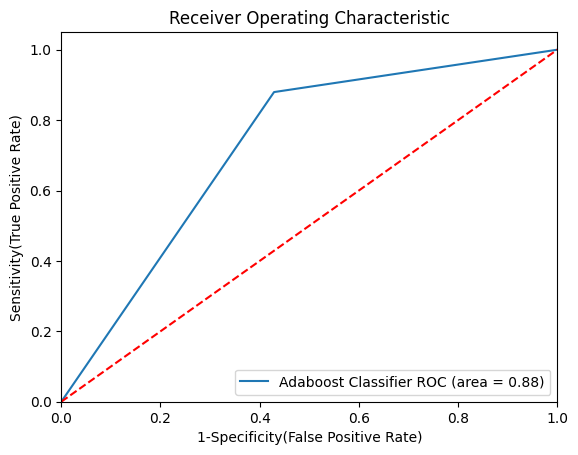

In [39]:
###Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

##Add the models to list that yu want to view on ROC plot
auc_models = [
          {
                    'label': "Adaboost Classifier",
                    'model': AdaBoostClassifier
    ( 
        estimator=DecisionTreeClassifier(max_depth=1, min_samples_split=2), 
        learning_rate =  0.01, 
        n_estimators = 50,
        random_state=42
        
        ),
                    'auc':  0.8797
          }
]

##create a loop through all model
for algo in auc_models:
          model = algo['model'] #select the model
          model.fit(X_train_resampled, y_train_resampled) #train the model
# Compute False positive rate, and True positive rate
          fpr, tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test_processed)[:,1])
# Calculate Area under th curve to display on plot
          plt.plot(fpr,tpr,label = "%s ROC (area = %0.2f)" % (algo['label'], algo['auc']))
#Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

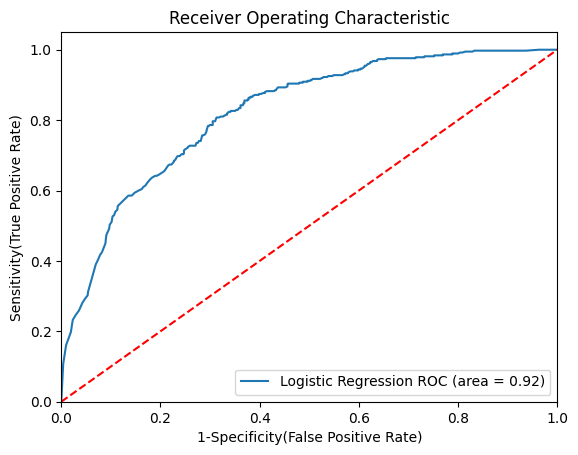

In [40]:
###Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

##Add the models to list that yu want to view on ROC plot
auc_models = [
          {
                    'label': "Logistic Regression",
    
    'model': LogisticRegression
    (
        C=0.001, 
        max_iter= 100, 
        penalty= 'l1',
        solver='liblinear'
        
        ),
                    'auc':  0.917
          }
]

##create a loop through all model
for algo in auc_models:
          model = algo['model'] #select the model
          model.fit(X_train_resampled, y_train_resampled) #train the model
# Compute False positive rate, and True positive rate
          fpr, tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test_processed)[:,1])
# Calculate Area under th curve to display on plot
          plt.plot(fpr,tpr,label = "%s ROC (area = %0.2f)" % (algo['label'], algo['auc']))
#Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

#### 📝 Suggested Report Summary:
After evaluating multiple models, the Adaboost Classifier provided the best balance for our churn prediction goal. It achieved a test recall of 87.9%, ensuring that most churn-risk customers are correctly identified. Unlike logistic regression, which had higher recall (91.7%) but very low accuracy (59.9%), Adaboost maintained a higher accuracy (65.3%), better precision, and a higher ROC AUC score (0.725).

Given the business importance of minimizing missed churners without overwhelming false positives, Adaboost is selected as the final model.